<a href="https://colab.research.google.com/github/ashishkumar30/Machine-Learning/blob/master/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import warnings
warnings.filterwarnings('ignore')

In [0]:
 # importing the dataset
dataset = pd.read_csv("C:/Users/Genius/Desktop/train/Big_mart.csv")
dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [0]:
dataset.shape

(8523, 12)

In [0]:
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [0]:
# Check missing values in dataset.
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

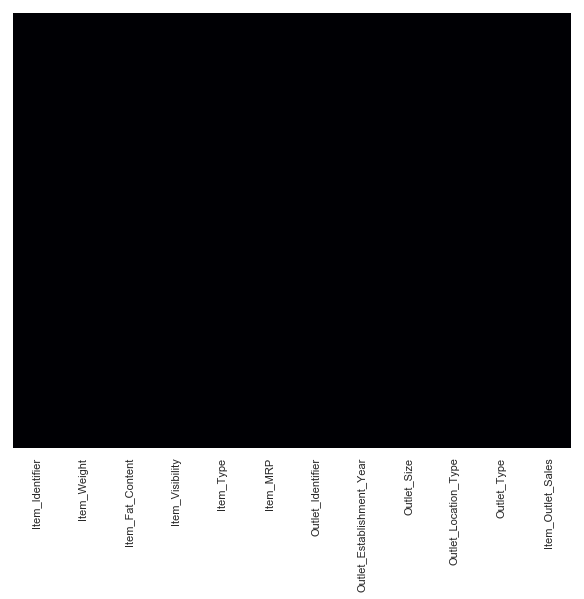

In [0]:
 # Show the Null values in a heatmap
sns.heatmap(dataset.isnull(),cbar=False,cmap='magma',yticklabels=False)
plt.show()

In [0]:
 dataset.describe(include ='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,7060,7060.000000,7060,7060.000000,7060,7060.000000,7060,7060.000000,7060,7060,7060,7060.000000
unique,1555,NaN,5,NaN,16,NaN,8,NaN,3,3,3,NaN
top,NCJ30,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT013,NaN,Small,Tier 2,Supermarket Type1,NaN
freq,8,NaN,4222,NaN,1019,NaN,932,NaN,4270,2785,5577,NaN
mean,NaN,12.857645,NaN,0.063963,NaN,141.240683,NaN,2000.490935,NaN,NaN,NaN,2118.626808
std,NaN,4.643456,NaN,0.048625,NaN,62.411888,NaN,6.588984,NaN,NaN,NaN,1533.445842
min,NaN,4.555000,NaN,0.000000,NaN,31.490000,NaN,1987.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026768,NaN,94.143600,NaN,1997.000000,NaN,NaN,NaN,922.798800
50%,NaN,12.600000,NaN,0.052493,NaN,142.729900,NaN,2002.000000,NaN,NaN,NaN,1789.670400
75%,NaN,16.850000,NaN,0.092774,NaN,186.024000,NaN,2007.000000,NaN,NaN,NaN,2966.139000


In [0]:
 average_weight = dataset.pivot_table(index ='Item_Identifier',values = 'Item_Weight')
average_weight.describe()

,Item_Weight
count,1555.000000
mean,12.808553
std,4.652088
min,4.555000
25%,8.710000
50%,12.600000
75%,16.750000
max,21.350000


In [0]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    if pd.isnull(Weight):
        return average_weight['Item_Weight'][average_weight.index == Identifier]
    else:
        return weight
        dataset['Item_Weight'] = dataset[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [0]:
dataset.loc[927,:].Item_weight = 12.782404
dataset.loc[1922,:].Item_Weight = 13.031230
dataset.loc[4187,:].Item_Weight = 13.379905
dataset.loc[5022,:].Item_Weight = 12.285317
dataset.isnull().sum()

In [0]:
 average_size = dataset.pivot_table(values = 'Outlet_Size',columns='Outlet_Type',aggfunc=lambda x:x.mode())

In [0]:
 average_size.T

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium


In [0]:
 def impute_size(x):
    size = x[0]
    index = x[1]
    new_size =''
    if pd.isnull(size):
        new_size = average_size.loc['Outlet_Size'][average_size.columns == index][0]
    else:
        new_size = size
    return new_size

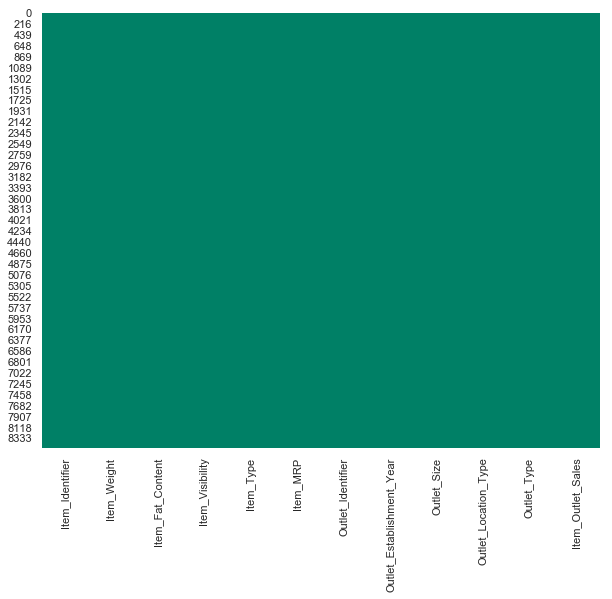

In [0]:
dataset['Outlet_Size'] = dataset[['Outlet_Size','Outlet_Type']].apply(impute_size,axis =1)
sns.heatmap(dataset.isnull(),cbar=False,cmap = 'summer')
plt.show()

In [0]:
dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [0]:
dataset = dataset.dropna(axis=0,how='any')
dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [0]:
average_visibility = dataset.pivot_table(index ='Item_Identifier',values='Item_Visibility')

In [0]:
 average_visibility.describe()

,Item_Visibility
count,1555.000000
mean,0.063383
std,0.042971
min,0.000000
25%,0.029039
50%,0.052115
75%,0.089684
max,0.223469


In [0]:
 def impute_visibility(x):
    identity = x[0]
    vis = x[1]
    new_vis = 0.0
    if vis == 0:
        new_vis = average_visibility['Item_Visibility'][average_visibility.index == identity]
    else:
        new_vis = vis
        return new_vis
        dataset['Item_Visibility'] = dataset[['Item_Identifier','Item_Visibility']].apply(impute_visibility,axis=1
).astype('float')
dataset.describe(include='all') 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,7060,7060.000000,7060,7060.000000,7060,7060.000000,7060,7060.000000,7060,7060,7060,7060.000000
unique,1555,NaN,5,NaN,16,NaN,8,NaN,3,3,3,NaN
top,NCJ30,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT013,NaN,Small,Tier 2,Supermarket Type1,NaN
freq,8,NaN,4222,NaN,1019,NaN,932,NaN,4270,2785,5577,NaN
mean,NaN,12.857645,NaN,0.063963,NaN,141.240683,NaN,2000.490935,NaN,NaN,NaN,2118.626808
std,NaN,4.643456,NaN,0.048625,NaN,62.411888,NaN,6.588984,NaN,NaN,NaN,1533.445842
min,NaN,4.555000,NaN,0.000000,NaN,31.490000,NaN,1987.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026768,NaN,94.143600,NaN,1997.000000,NaN,NaN,NaN,922.798800
50%,NaN,12.600000,NaN,0.052493,NaN,142.729900,NaN,2002.000000,NaN,NaN,NaN,1789.670400
75%,NaN,16.850000,NaN,0.092774,NaN,186.024000,NaN,2007.000000,NaN,NaN,NaN,2966.139000


In [0]:
dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266


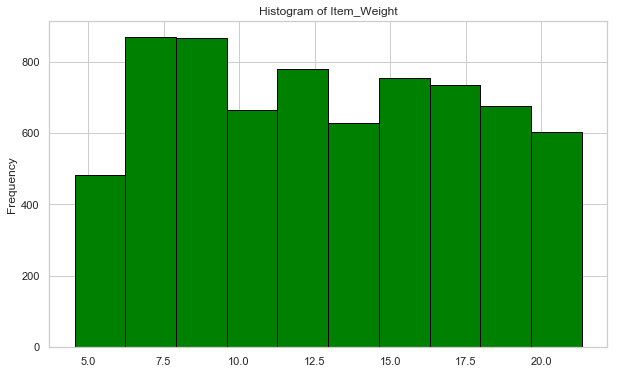

In [0]:
dataset.Item_Weight.plot(kind='hist', color='green', edgecolor='black', figsize=(10,6), title='Histogram of Item_Weight')
plt.show()

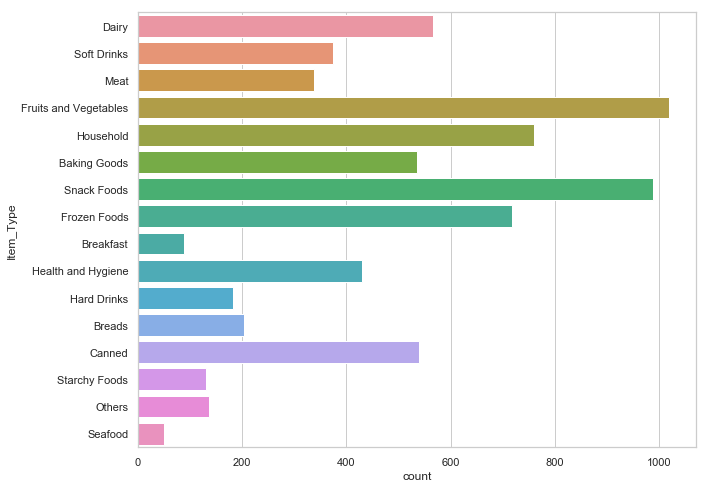

In [0]:
 sns.countplot(y=dataset['Item_Type'])
plt.show()

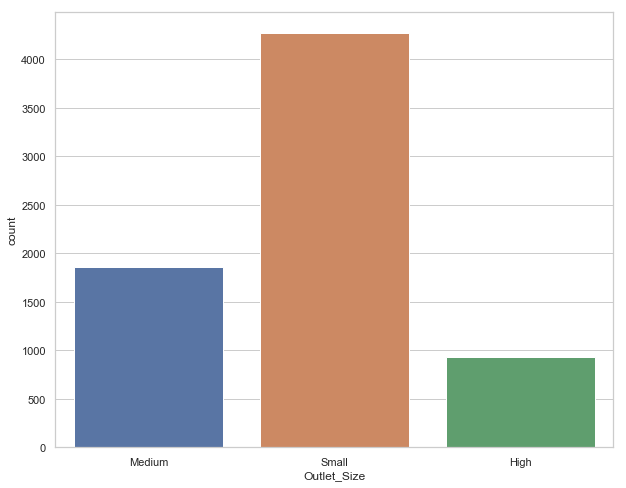

In [0]:
 sns.countplot(dataset['Outlet_Size'])
plt.show()

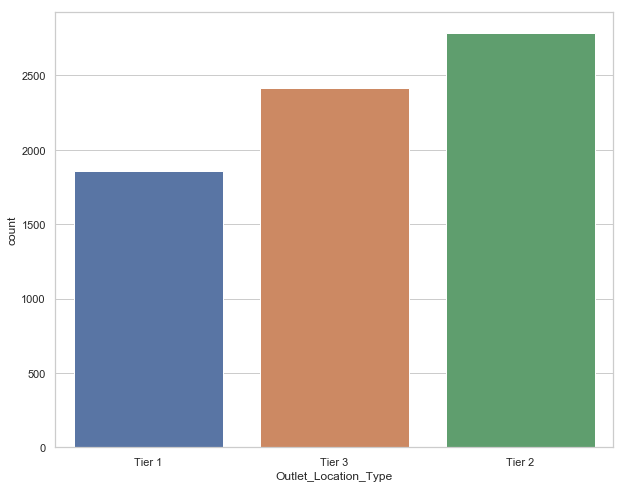

In [0]:
sns.countplot(dataset['Outlet_Location_Type'])
plt.show()

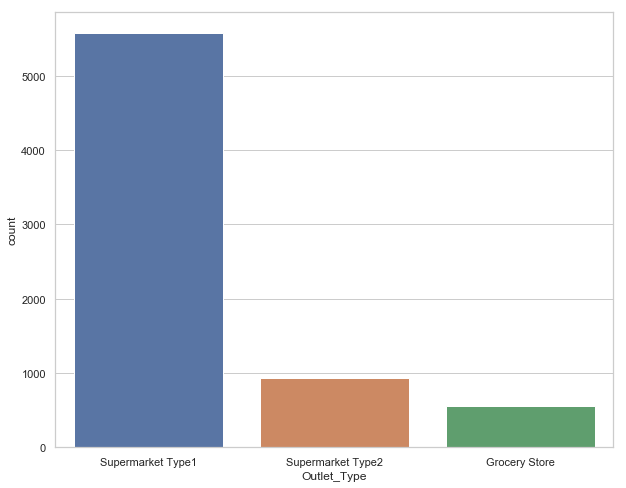

In [0]:
sns.countplot(dataset['Outlet_Type'])
plt.show()

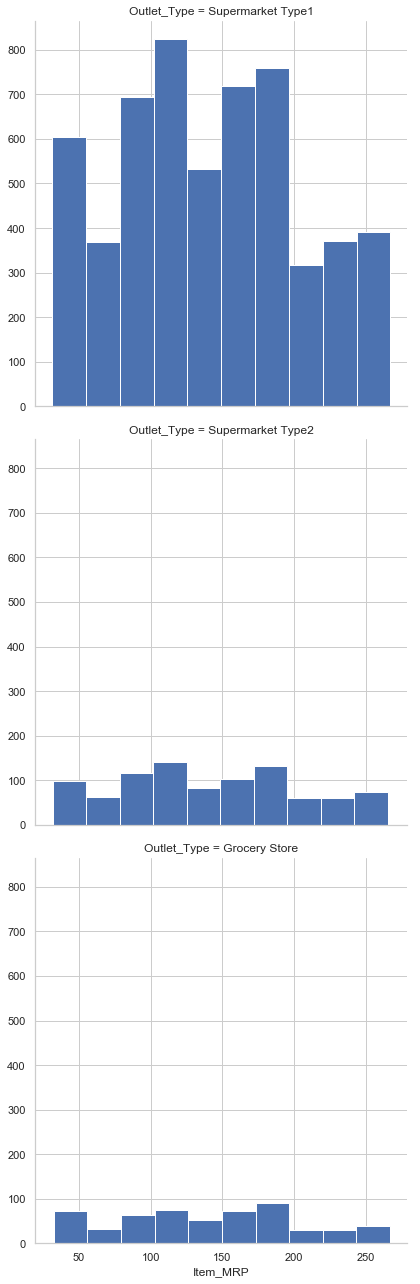

In [0]:
sns.FacetGrid(data = dataset,row = 'Outlet_Type',size = 6).map(plt.hist,'Item_MRP')
plt.show()

In [0]:
 # Split data into numerical data and categorical data for better visualization
#num is for numerical data
#cat is for categorical data
num = dataset.select_dtypes(exclude ='object')
cat = dataset.select_dtypes(include ='object')
print("Shape of num is {} and of cat is {}". format(num.shape,cat.shape))

Shape of num is (7060, 5) and of cat is (7060, 7)


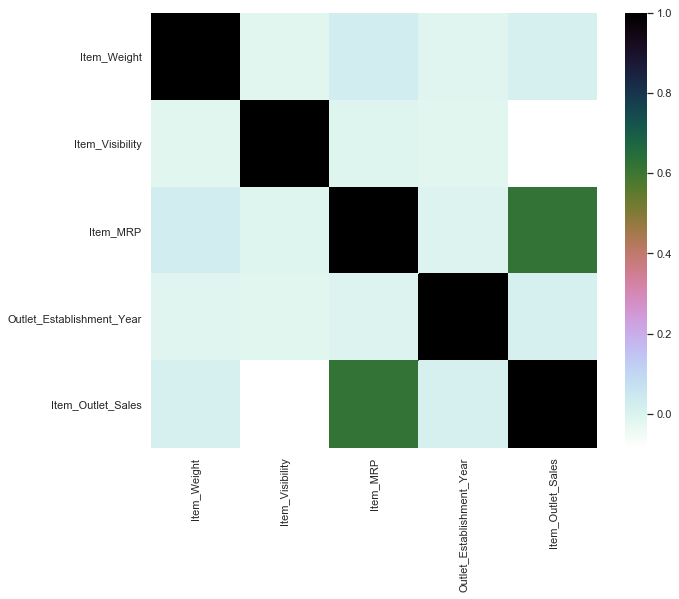

In [0]:
 # Heat map for analyzing correlation with sales price
corr = num.corr()
sns.set(style='whitegrid',color_codes=True)
plt.xticks(rotation=90)
sns.heatmap(corr,cmap = plt.cm.cubehelix_r)

In [0]:
 print(corr.Item_Outlet_Sales.sort_values(ascending = False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.620961
Item_Weight                  0.014123
Outlet_Establishment_Year    0.012212
Item_Visibility             -0.085334
Name: Item_Outlet_Sales, dtype: float64


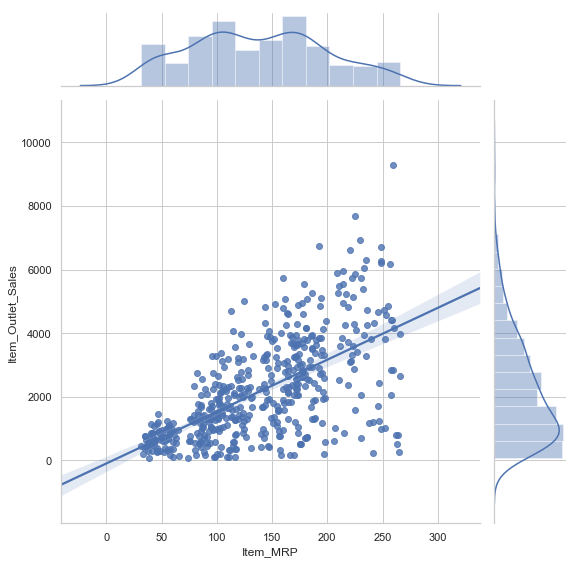

In [0]:
# Lets visualize it with saleprice
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',size=8 ,data = dataset.sample(500),kind = 'reg')
plt.show()

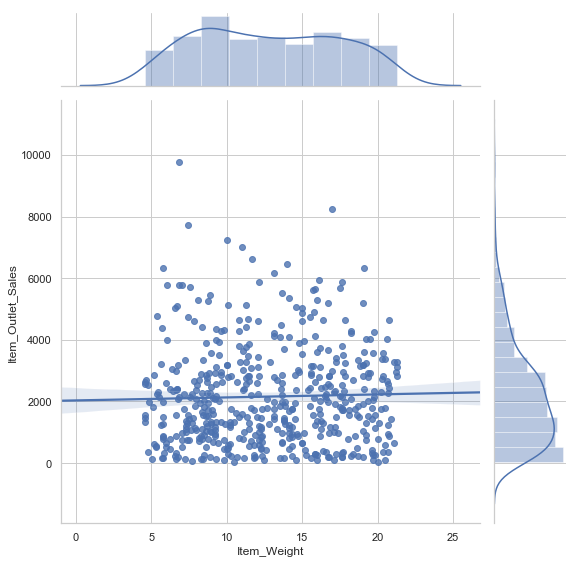

In [0]:
sns.jointplot(x='Item_Weight',y='Item_Outlet_Sales',size=8,kind='reg',data = dataset.sample(500))
plt.show()

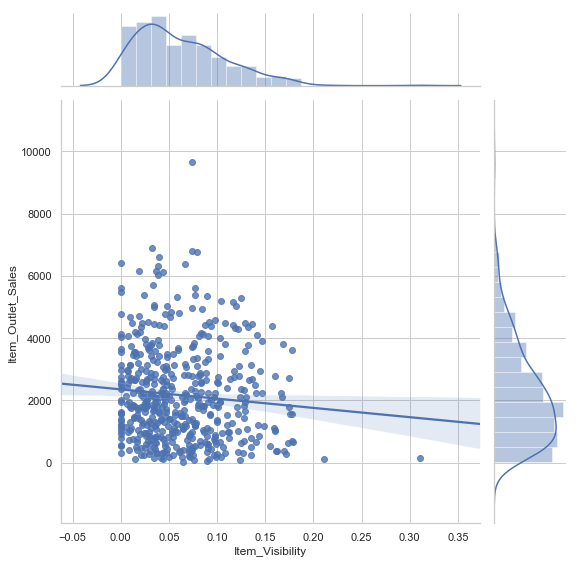

In [0]:
 sns.jointplot(x='Item_Visibility',y='Item_Outlet_Sales',size=8,kind='reg',data = dataset.sample(500))
plt.show()

In [0]:
# We will use ANOVA for categorical correrlation with sale
from scipy import stats
cate = [f for f in dataset.columns if dataset.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cate
    pvals = []
    for c in cate:
        samples = []
    for cls in frame[c].unique():
        s = frame[frame[c] == cls]['Item_Outlet_Sales'].values
        samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
        anv['pval'] = pvals
    return anv.sort_values('pval')

In [0]:
int_features =['Item_MRP','Item_Weight','Item_Identifier','Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Item_Type','Item_Outlet_Sales','Item_Fat_Content','Item_Visibility']
s_dataset = dataset[int_features]

In [0]:
 s_dataset.head()

,Item_MRP,Item_Weight,Item_Identifier,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Item_Type,Item_Outlet_Sales,Item_Fat_Content,Item_Visibility
0,249.8092,9.30,FDA15,OUT049,Tier 1,Medium,Dairy,3735.1380,Low Fat,0.016047
1,48.2692,5.92,DRC01,OUT018,Tier 3,Medium,Soft Drinks,443.4228,Regular,0.019278
2,141.6180,17.50,FDN15,OUT049,Tier 1,Medium,Meat,2097.2700,Low Fat,0.016760
3,182.0950,19.20,FDX07,OUT010,Tier 3,Small,Fruits and Vegetables,732.3800,Regular,0.000000
4,53.8614,8.93,NCD19,OUT013,Tier 3,High,Household,994.7052,Low Fat,0.000000


In [0]:
s_dataset['Item_Type_Combined'] = s_dataset['Item_Identifier'].map(lambda x : x[0:2])
s_dataset.Item_Type_Combined = s_dataset.Item_Type_Combined.map({"FD":"FOOD","DR":"DRINK","NC":"NON_CONSUMABLE"})

In [0]:
s_dataset.head()

,Item_MRP,Item_Weight,Item_Identifier,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Item_Type,Item_Outlet_Sales,Item_Fat_Content,Item_Visibility,Item_Costly,Item_Heavy,Item_Type_Combined
0,249.8092,9.30,FDA15,OUT049,Tier 1,Medium,Dairy,3735.1380,Low Fat,0.016047,0,1,FOOD
1,48.2692,5.92,DRC01,OUT018,Tier 3,Medium,Soft Drinks,443.4228,Regular,0.019278,1,1,DRINK
2,141.6180,17.50,FDN15,OUT049,Tier 1,Medium,Meat,2097.2700,Low Fat,0.016760,1,0,FOOD
3,182.0950,19.20,FDX07,OUT010,Tier 3,Small,Fruits and Vegetables,732.3800,Regular,0.000000,0,0,FOOD
4,53.8614,8.93,NCD19,OUT013,Tier 3,High,Household,994.7052,Low Fat,0.000000,1,1,NON_CONSUMABLE


In [0]:
 # 0 = True 1 =False
s_dataset['Item_Costly'] = s_dataset.Item_MRP.apply(lambda x : 0 if x >=150 else 1)
s_dataset['Item_Heavy'] = s_dataset.Item_Weight.apply(lambda x : 0 if x> 12 else 1)
s_dataset.head()

,Item_MRP,Item_Weight,Item_Identifier,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Item_Type,Item_Outlet_Sales,Item_Fat_Content,Item_Visibility,Item_Costly,Item_Heavy,Item_Type_Combined
0,249.8092,9.30,FDA15,OUT049,Tier 1,Medium,Dairy,3735.1380,Low Fat,0.016047,0,1,FOOD
1,48.2692,5.92,DRC01,OUT018,Tier 3,Medium,Soft Drinks,443.4228,Regular,0.019278,1,1,DRINK
2,141.6180,17.50,FDN15,OUT049,Tier 1,Medium,Meat,2097.2700,Low Fat,0.016760,1,0,FOOD
3,182.0950,19.20,FDX07,OUT010,Tier 3,Small,Fruits and Vegetables,732.3800,Regular,0.000000,0,0,FOOD
4,53.8614,8.93,NCD19,OUT013,Tier 3,High,Household,994.7052,Low Fat,0.000000,1,1,NON_CONSUMABLE


In [0]:
s_dataset.Item_Type_Combined.value_counts()

FOOD              5059
NON_CONSUMABLE    1326
DRINK              675
Name: Item_Type_Combined, dtype: int64

In [0]:
# Marking non consumable in fat content
idx = s_dataset.Item_Type_Combined == "NON_CONSUMABLE"
s_dataset.loc[idx,'Item_Fat_Content'] = 'NON_CONSUMABLE'
s_dataset.Item_Fat_Content = s_dataset.Item_Fat_Content.replace({"LF":'Low Fat',"reg":"Regular","low fat":"Low Fat"})
s_dataset.Item_Fat_Content.value_counts()

Low Fat           3240
Regular           2494
NON_CONSUMABLE    1326
Name: Item_Fat_Content, dtype: int64

In [0]:
 s_dataset.head()

,Item_MRP,Item_Weight,Item_Identifier,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Item_Type,Item_Outlet_Sales,Item_Fat_Content,Item_Visibility,Item_Costly,Item_Heavy,Item_Type_Combined
0,249.8092,9.30,FDA15,OUT049,Tier 1,Medium,Dairy,3735.1380,Low Fat,0.016047,0,1,FOOD
1,48.2692,5.92,DRC01,OUT018,Tier 3,Medium,Soft Drinks,443.4228,Regular,0.019278,1,1,DRINK
2,141.6180,17.50,FDN15,OUT049,Tier 1,Medium,Meat,2097.2700,Low Fat,0.016760,1,0,FOOD
3,182.0950,19.20,FDX07,OUT010,Tier 3,Small,Fruits and Vegetables,732.3800,Regular,0.000000,0,0,FOOD
4,53.8614,8.93,NCD19,OUT013,Tier 3,High,Household,994.7052,NON_CONSUMABLE,0.000000,1,1,NON_CONSUMABLE


In [0]:
s_dataset['Is_Item_Solid'] = (s_dataset.Item_Type_Combined == 'FOOD' )*1
s_dataset['Visibilty_2_MRP_Ratio'] = s_dataset.Item_Visibility/s_dataset.Item_MRP
s_dataset['Visibilty_2_Weight_Ratio'] = s_dataset.Item_Visibility/s_dataset.Item_Weight

In [0]:
 s_dataset.head()

,Item_MRP,Item_Weight,Item_Identifier,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Item_Type,Item_Outlet_Sales,Item_Fat_Content,Item_Visibility,Item_Costly,Item_Heavy,Item_Type_Combined,Is_Item_Solid,Visibilty_2_MRP_Ratio,Visibilty_2_Weight_Ratio
0,249.8092,9.30,FDA15,OUT049,Tier 1,Medium,Dairy,3735.1380,Low Fat,0.016047,0,1,FOOD,1,0.000064,0.001726
1,48.2692,5.92,DRC01,OUT018,Tier 3,Medium,Soft Drinks,443.4228,Regular,0.019278,1,1,DRINK,0,0.000399,0.003256
2,141.6180,17.50,FDN15,OUT049,Tier 1,Medium,Meat,2097.2700,Low Fat,0.016760,1,0,FOOD,1,0.000118,0.000958
3,182.0950,19.20,FDX07,OUT010,Tier 3,Small,Fruits and Vegetables,732.3800,Regular,0.000000,0,0,FOOD,1,0.000000,0.000000
4,53.8614,8.93,NCD19,OUT013,Tier 3,High,Household,994.7052,NON_CONSUMABLE,0.000000,1,1,NON_CONSUMABLE,0,0.000000,0.000000


In [0]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
var = ['Outlet_Location_Type','Item_Identifier','Outlet_Identifier','Outlet_Size','Item_Type','Item_Type_Combined','Item_Fat_Content']
le = LabelEncoder()
for _ in var:
    s_dataset[_] = le.fit_transform(s_dataset[_])
s_dataset.head()

,Item_MRP,Item_Weight,Item_Identifier,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Item_Type,Item_Outlet_Sales,Item_Fat_Content,Item_Visibility,Item_Costly,Item_Heavy,Item_Type_Combined,Is_Item_Solid,Visibilty_2_MRP_Ratio,Visibilty_2_Weight_Ratio
0,249.8092,9.30,156,7,0,1,4,3735.1380,0,0.016047,0,1,1,1,0.000064,0.001726
1,48.2692,5.92,8,3,2,1,14,443.4228,2,0.019278,1,1,0,0,0.000399,0.003256
2,141.6180,17.50,660,7,0,1,10,2097.2700,0,0.016760,1,0,1,1,0.000118,0.000958
3,182.0950,19.20,1117,0,2,2,6,732.3800,2,0.000000,0,0,1,1,0.000000,0.000000
4,53.8614,8.93,1293,1,2,0,9,994.7052,1,0.000000,1,1,2,0,0.000000,0.000000


In [0]:
# One Hot Encoding
s_dataset = pd.get_dummies(s_dataset,columns=['Outlet_Location_Type','Is_Item_Solid','Item_Identifier','Outlet_Identifier','Outlet_Size','Item_Type','Item_Fat_Content','Item_Type_Combined','Item_Costly','Item_Heavy'])
s_dataset.head()

,Item_MRP,Item_Weight,Item_Outlet_Sales,Item_Visibility,Visibilty_2_MRP_Ratio,Visibilty_2_Weight_Ratio,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Is_Item_Solid_0,...,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Item_Costly_0,Item_Costly_1,Item_Heavy_0,Item_Heavy_1
0,249.8092,9.30,3735.1380,0.016047,0.000064,0.001726,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
1,48.2692,5.92,443.4228,0.019278,0.000399,0.003256,0,0,1,1,...,0,0,1,1,0,0,0,1,0,1
2,141.6180,17.50,2097.2700,0.016760,0.000118,0.000958,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0
3,182.0950,19.20,732.3800,0.000000,0.000000,0.000000,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0
4,53.8614,8.93,994.7052,0.000000,0.000000,0.000000,0,0,1,1,...,0,1,0,0,0,1,0,1,0,1


In [0]:
s_dataset.isnull().sum()

Item_MRP                    0
Item_Weight                 0
Item_Outlet_Sales           0
Item_Visibility             0
Visibilty_2_MRP_Ratio       0
Visibilty_2_Weight_Ratio    0
Outlet_Location_Type_0      0
Outlet_Location_Type_1      0
Outlet_Location_Type_2      0
Is_Item_Solid_0             0
Is_Item_Solid_1             0
Item_Identifier_0           0
Item_Identifier_1           0
Item_Identifier_2           0
Item_Identifier_3           0
Item_Identifier_4           0
Item_Identifier_5           0
Item_Identifier_6           0
Item_Identifier_7           0
Item_Identifier_8           0
Item_Identifier_9           0
Item_Identifier_10          0
Item_Identifier_11          0
Item_Identifier_12          0
Item_Identifier_13          0
Item_Identifier_14          0
Item_Identifier_15          0
Item_Identifier_16          0
Item_Identifier_17          0
Item_Identifier_18          0
                           ..
Outlet_Identifier_7         0
Outlet_Size_0               0
Outlet_Siz

In [0]:
 x = s_dataset.iloc[:,0:]
y = s_dataset.iloc[:,2]
x = x.drop(labels = ['Item_Outlet_Sales'],axis =1)
x.head()

,Item_MRP,Item_Weight,Item_Visibility,Visibilty_2_MRP_Ratio,Visibilty_2_Weight_Ratio,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Is_Item_Solid_0,Is_Item_Solid_1,...,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Item_Costly_0,Item_Costly_1,Item_Heavy_0,Item_Heavy_1
0,249.8092,9.30,0.016047,0.000064,0.001726,1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
1,48.2692,5.92,0.019278,0.000399,0.003256,0,0,1,1,0,...,0,0,1,1,0,0,0,1,0,1
2,141.6180,17.50,0.016760,0.000118,0.000958,1,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
3,182.0950,19.20,0.000000,0.000000,0.000000,0,0,1,0,1,...,0,0,1,0,1,0,1,0,1,0
4,53.8614,8.93,0.000000,0.000000,0.000000,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,1


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
round(reg.score(x_train,y_train) * 100,2)

66.16

In [0]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
 tree_accuracy = round(tree.score(x_train,y_train),2)
tree_accuracy

0.54

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
rf_accuracy = round(rf.score(x_train,y_train),2)
rf_accuracy

0.53

In [0]:
rf_accuracy = round(rf.score(x_train,y_train),2)
rf_accuracy

0.53